In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\USER\Downloads\Mall_Customers (1).csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [21]:
df.rename(columns={"Genre":"Gender","Annual Income (k$)":"Annual Income","Spending Score (1-100)":"Spending Score"},inplace=True)

In [22]:
df

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


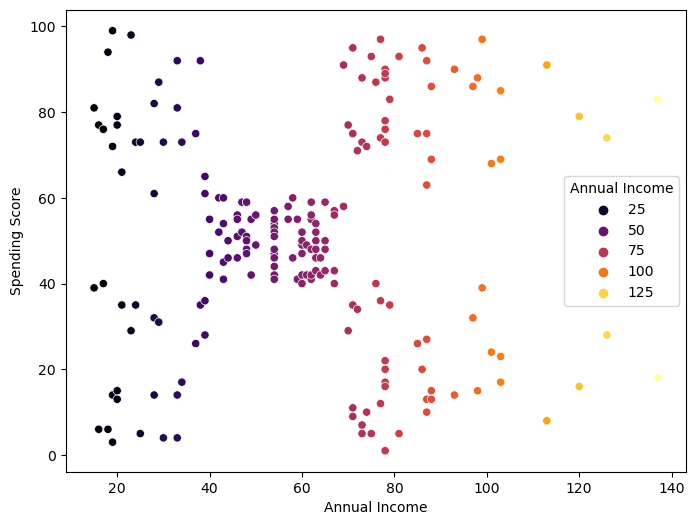

In [40]:
# Create a scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income', y='Spending Score', data=df, hue= 'Annual Income',palette="inferno")
plt.show()

#'viridis'
#'plasma'
#'inferno'
#'magma'
#'coolwarm'
#'cividis'

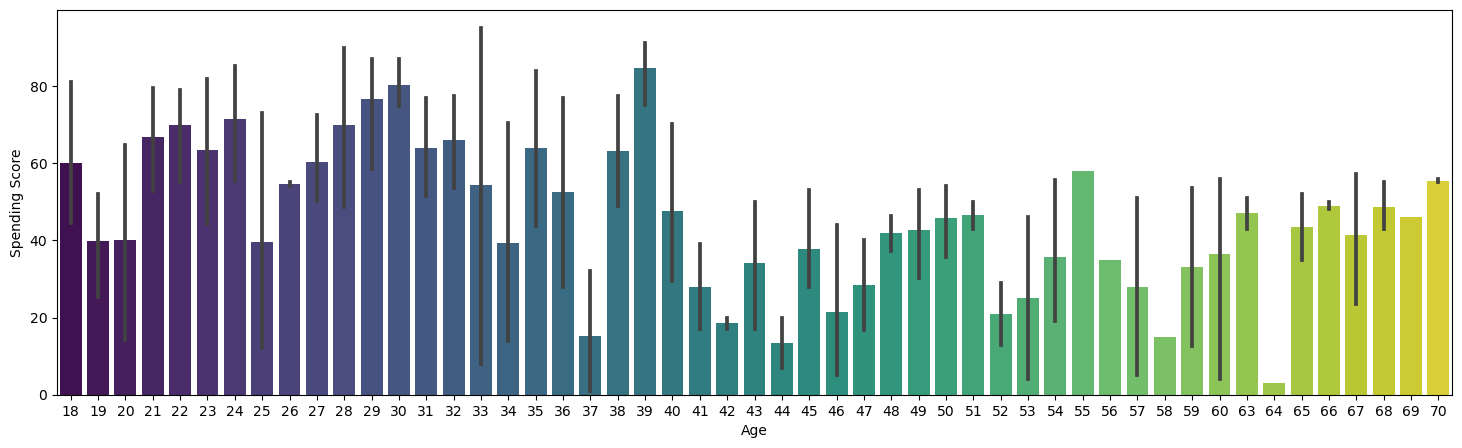

In [34]:
plt.figure(figsize=(18,5))
sns.barplot(x='Age', y='Spending Score', data=df, palette='viridis')
plt.show()

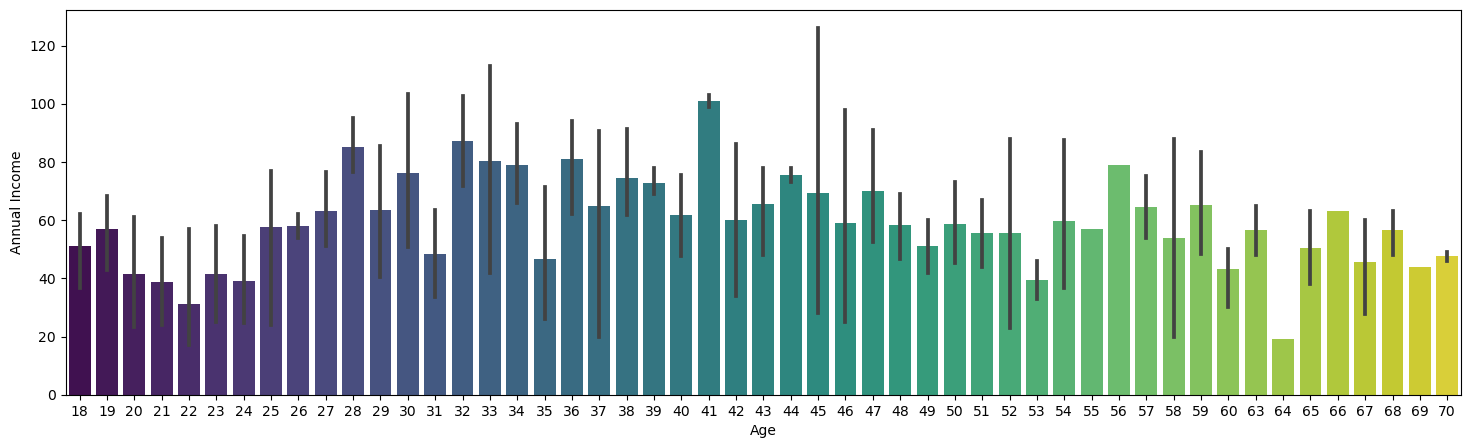

In [36]:
plt.figure(figsize=(18,5))
sns.barplot(x='Age', y='Annual Income', data=df, palette='viridis')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Spending Score'>

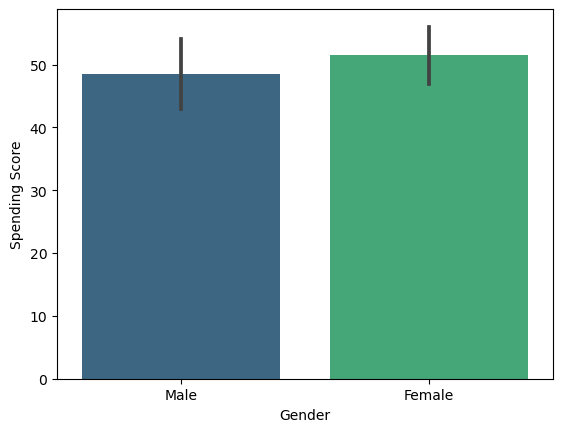

In [35]:
sns.barplot(x='Gender', y='Spending Score', data=df, palette='viridis')

<AxesSubplot:xlabel='Gender', ylabel='Annual Income'>

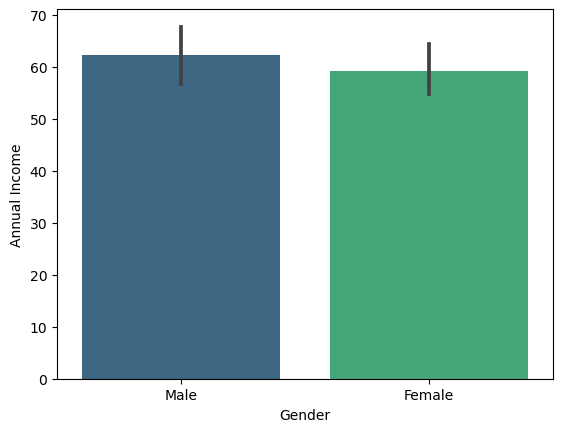

In [37]:
sns.barplot(x='Gender', y='Annual Income', data=df, palette='viridis')

In [61]:
from sklearn.cluster import KMeans
x=df[["Annual Income","Spending Score"]].values
model=KMeans(n_clusters=5).fit(x)

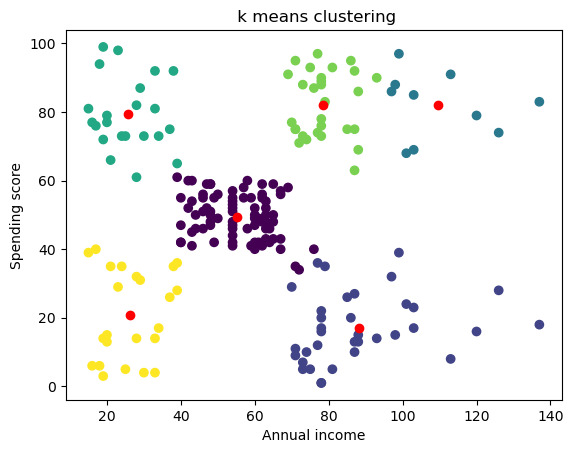

In [60]:
labels = model.labels_

centers = model.cluster_centers_

plt.scatter(x[:,0],x[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],c="red")

plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.title(" k means clustering")

plt.show()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


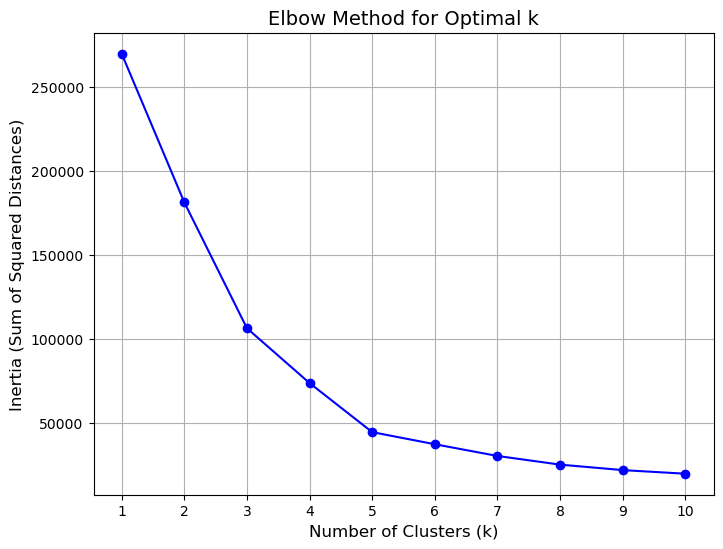

In [62]:
inertia = []

# Try different values of k (from 1 to 10, for example)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [63]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 19657.783608703954


In [65]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.44760979994374317
